In [142]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')
pd.set_option("display.precision", 3)

In [143]:
df = pd.read_excel('data/MSCIs_copy.xlsx')
print(df.shape)
pd.set_option('display.max_columns',735) # I want to see all the columns
pd.set_option('display.max_rows',735) 

(1827, 38)


In [144]:
df.drop(columns='Unnamed: 0', inplace=True)
df.rename(columns={'Date':'date'}, inplace=True)

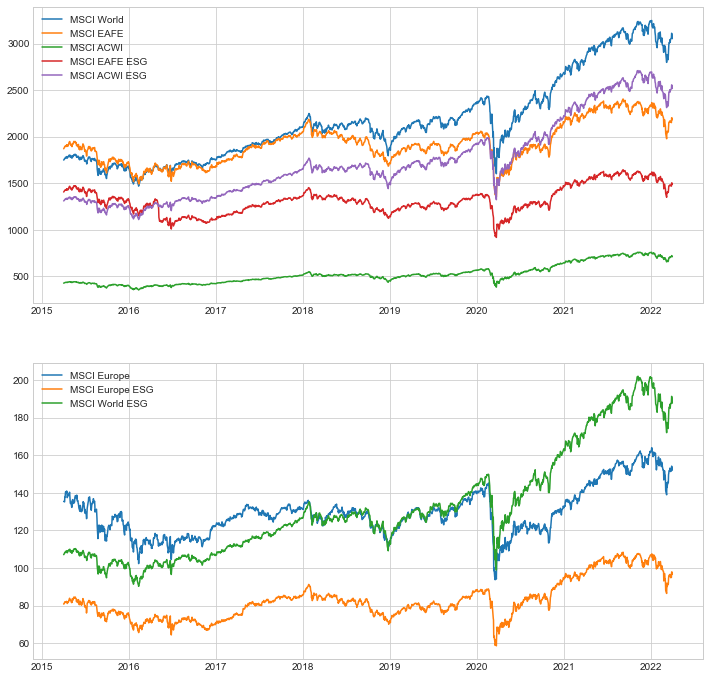

In [146]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(2,1,1)

ax.plot(df['date'],df['MSCI_World'], label='MSCI World')
ax.plot(df['date'],df['MSCI_EAFE'], label='MSCI EAFE')
ax.plot(df['date'],df['MSCI_ACWI'], label='MSCI ACWI')
ax.plot(df['date'],df['MSCI_EAFE_ESG_F'], label='MSCI EAFE ESG')
ax.plot(df['date'],df['MSCI_ACWI_ESG_L'], label='MSCI ACWI ESG')
ax2 = fig.add_subplot(2,1,2)
ax2.plot(df['date'],df['MSCI_Europe'], label='MSCI Europe')
ax2.plot(df['date'],df['MSCI_Europe_ESG_L'], label='MSCI Europe ESG')
ax2.plot(df['date'],df['MSCI_World_ESG_L'], label='MSCI World ESG')
ax.legend()
ax2.legend()
plt.savefig('raw.png');

In [147]:
3.6*1.3

4.680000000000001

In [148]:
df.head(5)

,date,MSCI_World,MSCI_EAFE,MSCI_ACWI,MSCI_Europe,MSCI_World_ESG_L,MSCI_EAFE_ESG_F,MSCI_ACWI_ESG_L,MSCI_Europe_ESG_L,LogMSCI_World,LogMSCI_EAFE,LogMSCI_ACWI,LogMSCI_Europe,LogMSCI_World_ESG_L,LogMSCI_EAFE_ESG_F,LogMSCI_ACWI_ESG_L,LogMSCI_Europe_ESG_L,DLogMSCI_World,DLogMSCI_EAFE,DLogMSCI_ACWI,DLogMSCI_Europe,DLogMSCI_World_ESG_L,DLogMSCI_EAFE_ESG_F,DLogMSCI_ACWI_ESG_L,DLogMSCI_Europe_ESG_L,CondVar_DLogMSCI_EAFE,CondVar_DLogMSCI_EAFE_ESG_F,CORR_DLogMSCI_EAFE_DLogMSCI_EAFE_ESG_F,CondVar_DLogMSCI_World,CondVar_DLogMSCI_World_ESG_L,CORR_DLogMSCI_World_DLogMSCI_World_ESG_L,CondVar_DLogMSCI_ACWI,CondVar_DLogMSCI_ACWI_ESG_L,CORR_DLogMSCI_ACWI_DLogMSCI_ACWI_ESG_L,CondVar_DLogMSCI_Europe,CondVar_DLogMSCI_Europe_ESG_L,CORR_DLogMSCI_Europe_DLogMSCI_Europe_ESG_L
0,2015-04-02,1749.34,1870.36,427.45,135.42,107.10,1406.10,1310.34,80.81,7.467,7.534,6.058,4.908,4.674,7.249,7.178,4.392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-04-03,1750.26,1872.87,427.72,135.42,107.17,1408.25,1311.34,80.81,7.468,7.535,6.058,4.908,4.674,7.250,7.179,4.392,0.053,0.134,0.063,0.000,0.065,0.153,0.076,0.000,0.872,0.884,0.999,0.932,0.918,0.994,0.867,0.852,0.994,1.211,1.265,0.803
2,2015-04-06,1764.49,1890.81,431.35,135.15,108.00,1421.47,1321.79,81.76,7.476,7.545,6.067,4.906,4.682,7.259,7.187,4.404,0.810,0.953,0.845,-0.200,0.771,0.934,0.794,1.169,0.789,0.799,0.999,0.835,0.821,0.994,0.783,0.768,0.994,1.101,1.163,0.803
3,2015-04-07,1764.24,1895.36,431.32,137.69,107.98,1425.22,1321.72,81.93,7.475,7.547,6.067,4.925,4.682,7.262,7.187,4.406,-0.014,0.240,-0.007,1.862,-0.019,0.263,-0.005,0.208,0.786,0.791,0.999,0.799,0.782,0.994,0.760,0.738,0.995,1.009,1.161,0.760
4,2015-04-08,1766.44,1893.81,432.47,137.65,108.22,1425.84,1326.06,81.60,7.477,7.546,6.070,4.925,4.684,7.263,7.190,4.402,0.125,-0.082,0.266,-0.029,0.222,0.043,0.328,-0.404,0.717,0.722,0.999,0.719,0.702,0.994,0.689,0.668,0.995,1.183,1.071,0.705


In [152]:
correl = df.loc[:,'DLogMSCI_World':'DLogMSCI_Europe_ESG_L'].corr()
#print(correl.to_latex(index = True, multirow = True))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  DLogMSCI\_World &  DLogMSCI\_EAFE &  DLogMSCI\_ACWI &  DLogMSCI\_Europe &  DLogMSCI\_World\_ESG\_L &  DLogMSCI\_EAFE\_ESG\_F &  DLogMSCI\_ACWI\_ESG\_L &  DLogMSCI\_Europe\_ESG\_L \\
\midrule
DLogMSCI\_World        &           1.000 &          0.761 &          0.995 &            0.754 &                 0.996 &                0.758 &                0.991 &                  0.756 \\
DLogMSCI\_EAFE         &           0.761 &          1.000 &          0.791 &            0.844 &                 0.762 &                0.998 &                0.793 &                  0.935 \\
DLogMSCI\_ACWI         &           0.995 &          0.791 &          1.000 &            0.769 &                 0.990 &                0.788 &                0.996 &                  0.773 \\
DLogMSCI\_Europe       &           0.754 &          0.844 &          0.769 &            1.000 &                 0.754 &                0.841 &                0.770 &                  0.900 \\